In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.91'

In [2]:
# Get from here - https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/EOS_calculations/Fluid_Inclusion_Densities_Example1.xlsx
df=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx', sheet_name='Diff_Temps')
df.head()
kamaehu_averaged=df
df2=df
df2.head()

,Sample,Density_g_cm3,T_C,Host_Fo_content
0,FI1,0.477880,1048.898738,0.897797
1,FI2,0.495756,1015.924767,0.831850
2,FI4,0.409078,1041.589916,0.883180
3,FI5,0.425325,1034.935183,0.869870
4,FI7,0.461696,1034.820102,0.869640


You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\error_propagation.py:739: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'DZ06' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_step.at[i, key] = value


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,FI1,0.0,0.477880,7.741180,2.050406,2.040509,2.026419,0.220448,0.207231,7.682472,...,1322.048738,104.889874,0.477880,0.023894,2700.0,5.0,NaN,DZ06,0.1,0.0
1,FI2,1.0,0.495756,7.981689,2.114110,2.100814,2.088983,0.231718,0.217242,7.909352,...,1289.074767,101.592477,0.495756,0.024788,2700.0,5.0,NaN,DZ06,0.1,0.0
2,FI4,2.0,0.409078,6.074132,1.608855,1.595691,1.583883,0.170596,0.163178,6.007687,...,1314.739916,104.158992,0.409078,0.020454,2700.0,5.0,NaN,DZ06,0.1,0.0
3,FI5,3.0,0.425325,6.404772,1.696432,1.682256,1.670968,0.181174,0.173879,6.333576,...,1308.085183,103.493518,0.425325,0.021266,2700.0,5.0,NaN,DZ06,0.1,0.0
4,FI7,4.0,0.461696,7.285976,1.929836,1.908342,1.905756,0.204981,0.191654,7.184630,...,1307.970102,103.482010,0.461696,0.023085,2700.0,5.0,NaN,DZ06,0.1,0.0


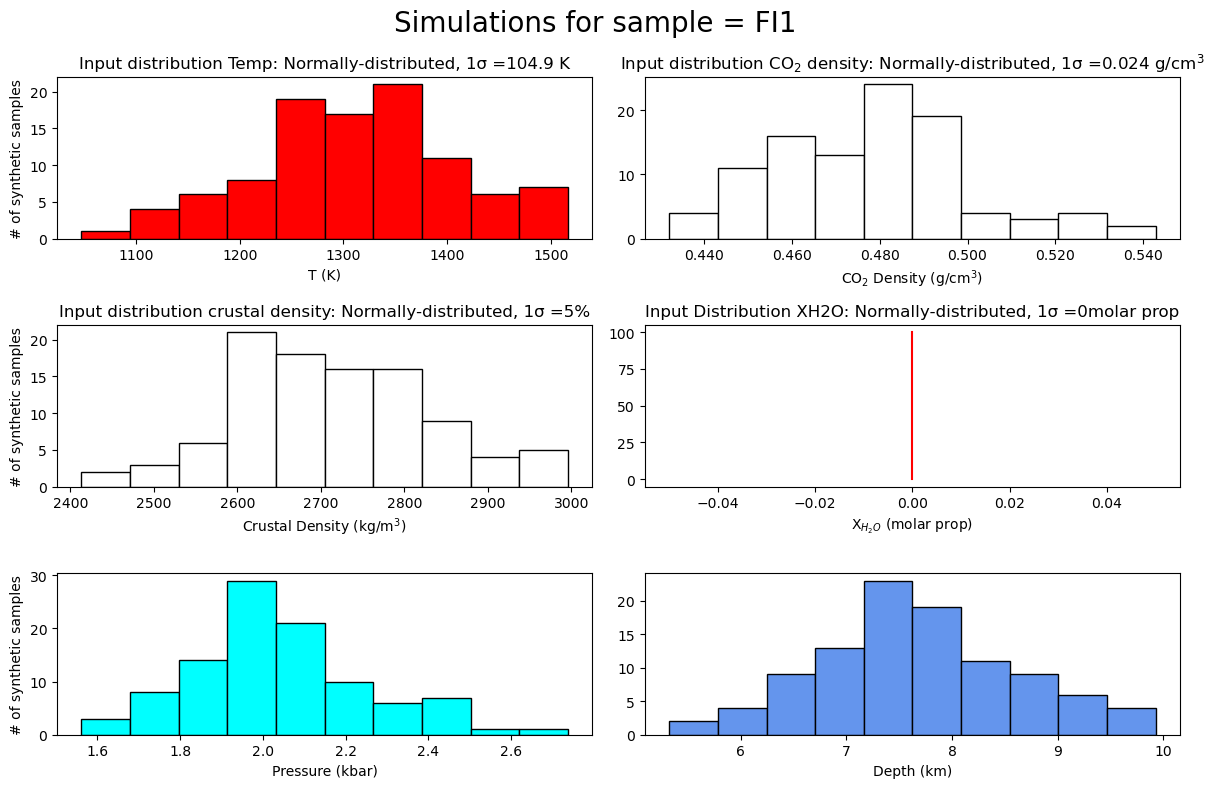

In [3]:

MC_Av_rho_T_CDH_mp, MC_All_rho_T_CDH_mp, fig =pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15,
error_CO2_dens=df2['Density_g_cm3']*0.05, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=df2['T_C']*0.1, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700, XH2O=0.1,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df2['Density_g_cm3'],  
sample_ID=df2['Sample'],
N_dup=100, fig_i=0, plot_figure=True)
MC_Av_rho_T_CDH_mp.head()

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS


Processing: 100%|██████████| 60/60 [00:24<00:00,  2.46it/s]


,Filename,CO2_dens_gcm3,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,FI1,0.477880,7.741180,2.050406,2.040509,2.026419,0.220448,0.207231,7.682472,7.609972,...,1322.048738,104.889874,0.477880,0.023894,2700,5.0,None,DZ06,0.1,0
1,FI2,0.495756,7.981689,2.114110,2.086262,2.069375,0.252544,0.236602,7.895556,7.873674,...,1289.074767,101.592477,0.495756,0.024788,2700,5.0,None,DZ06,0.1,0
2,FI4,0.409078,6.074132,1.608855,1.647888,1.656688,0.165697,0.162778,6.207640,6.156110,...,1314.739916,104.158992,0.409078,0.020454,2700,5.0,None,DZ06,0.1,0
3,FI5,0.425325,6.404772,1.696432,1.700250,1.681753,0.202190,0.196353,6.478567,6.456944,...,1308.085183,103.493518,0.425325,0.021266,2700,5.0,None,DZ06,0.1,0
4,FI7,0.461696,7.285976,1.929836,1.964028,1.970738,0.228099,0.216603,7.400854,7.376625,...,1307.970102,103.482010,0.461696,0.023085,2700,5.0,None,DZ06,0.1,0


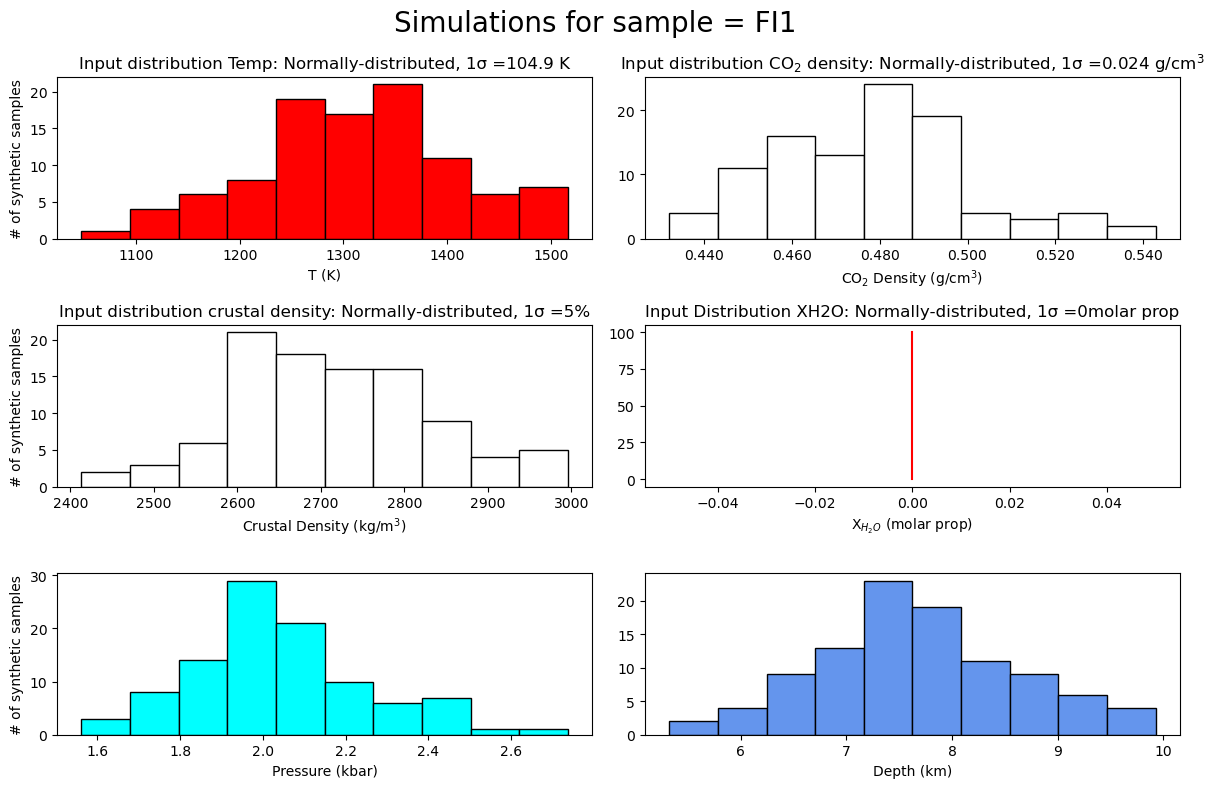

In [4]:

MC_Av_rho_T_CDH_mp, MC_All_rho_T_CDH_mp, fig =pf.propagate_FI_uncertainty(T_K=df['T_C']+273.15, multiprocess=False,
error_CO2_dens=df2['Density_g_cm3']*0.05, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=df2['T_C']*0.1, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700, XH2O=0.1,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df2['Density_g_cm3'],  
sample_ID=df2['Sample'],
N_dup=100, fig_i=0, plot_figure=True)
MC_Av_rho_T_CDH_mp.head()

In [7]:
MC_Av_rho_T_CDH_mp.to_clipboard(excel=True)

If calculations are taking a long time, set multiprocess=True in the function - it should really speed it up


Processing:   0%|          | 0/60 [00:00<?, ?it/s]

Processing: 100%|██████████| 60/60 [00:00<00:00, 142.73it/s]


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_Press_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,std_dev_MC_D_km,std_dev_MC_D_km_from_percentile,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS
0,FI1,0.0,0.477880,6.786949,1.797659,1.784620,1.777799,0.188155,0.177373,6.730717,...,0.762525,0.815602,1322.048738,104.889874,0.477880,0.023894,2700.0,5.0,NaN,SW96
1,FI2,1.0,0.495756,6.981408,1.849166,1.835954,1.828615,0.195295,0.184304,6.924336,...,0.790662,0.845830,1289.074767,101.592477,0.495756,0.024788,2700.0,5.0,NaN,SW96
2,FI4,2.0,0.409078,5.341275,1.414744,1.403971,1.395727,0.143033,0.135725,5.295065,...,0.582022,0.609738,1314.739916,104.158992,0.409078,0.020454,2700.0,5.0,NaN,SW96
3,FI5,3.0,0.425325,5.620046,1.488582,1.477360,1.471181,0.151752,0.143788,5.571856,...,0.616865,0.647516,1308.085183,103.493518,0.425325,0.021266,2700.0,5.0,NaN,SW96
4,FI7,4.0,0.461696,6.355527,1.683388,1.671019,1.664754,0.174802,0.164591,6.302256,...,0.709020,0.753967,1307.970102,103.482010,0.461696,0.023085,2700.0,5.0,NaN,SW96


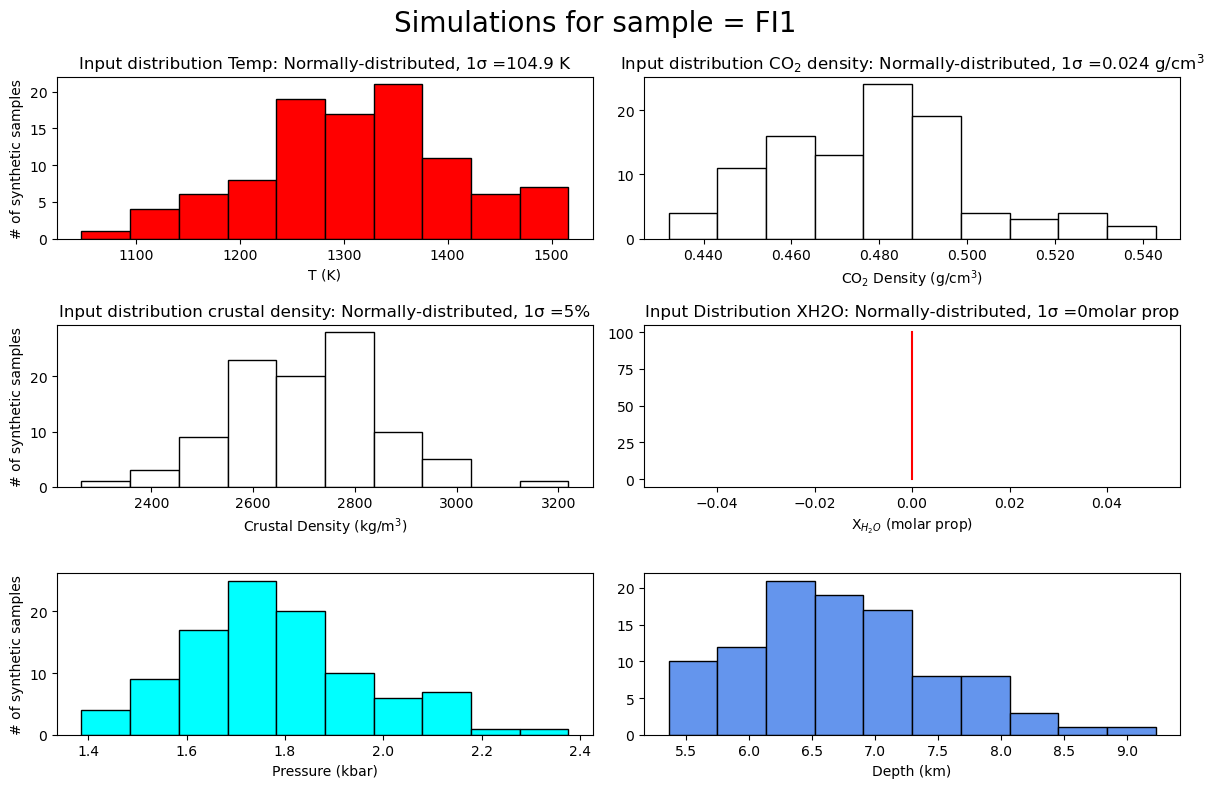

In [5]:

MC_Av_rho_T_CDH_nomp, MC_All_rho_T_CDH_nomp, fig =pf.propagate_FI_uncertainty(multiprocess=False, T_K=df['T_C']+273.15,
error_CO2_dens=df2['Density_g_cm3']*0.05, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_T_K=df2['T_C']*0.1, error_type_T_K='Abs', error_dist_T_K='normal',
crust_dens_kgm3=2700,
error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal',                                            
CO2_dens_gcm3=df2['Density_g_cm3'],
sample_ID=df2['Sample'],
N_dup=100, fig_i=0, plot_figure=True)
MC_Av_rho_T_CDH_mp.head()

In [8]:
MC_Av_rho_T_CDH_nomp.to_clipboard(excel=True)